In [11]:
#https://towardsdatascience.com/build-and-deploy-your-first-machine-learning-web-app-e020db344a99
#https://github.com/pycaret/deployment-heroku/blob/master/Insurance%20-%20Model%20Training%20Notebook.ipynb
## for Jupyter notebook on your local computer
# in Anaconda Prompt type: 'conda install --force-reinstall pywin32' to solve kernel error 


In [9]:
#conda env list #list numbers of enviroment

In [1]:
conda create -n py39 python=3.9 -y #created virtual environment named py39

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\wenny.hamilton\AppData\Local\Continuum\anaconda3\envs\py39

  added / updated specs:
    - python=3.9


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.1.19  |       haa95532_0         122 KB
    certifi-2020.12.5          |   py39haa95532_0         141 KB
    openssl-1.1.1i             |       h2bbff1b_0         4.8 MB
    pip-20.3.3                 |   py39haa95532_0         1.8 MB
    python-3.9.1               |       h6244533_2        16.4 MB
    setuptools-52.0.0          |   py39haa95532_0         725 KB
    sqlite-3.33.0              |       h2a8f88b_0         809 KB
    tzdata-2020f               |       h52ac0ba_0         113 KB
    vc-14.2                    |       h21ff451_1           8 KB
    vs2015_runtime-14.27.29016 |       h5e58377_2        1007 KB
    whee

In [4]:
conda activate py39 #before run any script,alway activate py39 as virtual environment 


Note: you may need to restart the kernel to use updated packages.


activate does not accept more than one argument:
['py39', '#before', 'run', 'any', 'script,alway', 'py39', 'as', 'virtual', 'environment']



In [7]:
pip install jupyter

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
pd.show_versions() #check pandas version


INSTALLED VERSIONS
------------------
commit           : 7d32926db8f7541c356066dcadabf854487738de
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.18362
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.2.2
numpy            : 1.20.1
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.2.3
setuptools       : 41.4.0
Cython           : 0.29.14
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.8.4 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 7.8.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       :

In [6]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
from pycaret.regression import *

In [8]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [9]:

lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9668,33302032.0000,5770.7915,0.8011,-0.0000,0.4153
1,4503.7373,43746484.0000,6614.1123,0.7456,-0.0000,0.4217
2,3880.5542,31795154.0000,5638.7192,0.5974,-0.0000,0.4396
3,3747.6450,26805306.0000,5177.3843,0.7762,-0.0000,0.5175
4,4471.0425,43410540.0000,6588.6675,0.6771,-0.0000,0.3767
5,4182.7559,36166336.0000,6013.8452,0.7674,-0.0000,0.4320
6,4081.1018,39192588.0000,6260.3984,0.7333,-0.0000,0.4241
7,4928.1533,46415028.0000,6812.8574,0.7448,-0.0000,0.4137
8,4609.3140,40370352.0000,6353.7666,0.7392,-0.0000,0.5111
9,4665.8652,42596792.0000,6526.6216,0.7256,-0.0000,0.4802


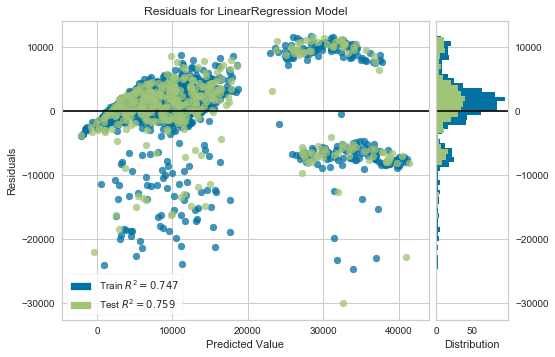

In [10]:
plot_model(lr)

In [11]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [12]:
s2[0]

'box-cox'

In [13]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3139.2427,21534868.0000,4640.5679,0.8714,-0.0000,0.3419
1,3454.4502,32315326.0000,5684.6572,0.8121,-0.0000,0.3338
2,3039.5056,23819994.0000,4880.5732,0.6984,-0.0000,0.3942
3,3079.6038,20282542.0000,4503.6143,0.8306,-0.0000,0.4355
4,3411.7087,29967652.0000,5474.2720,0.7771,-0.0000,0.3194
5,3213.9451,26067872.0000,5105.6704,0.8323,-0.0000,0.3024
6,3035.1802,26974090.0000,5193.6587,0.8165,-0.0000,0.3131
7,3545.9883,30856398.0000,5554.8535,0.8303,-0.0000,0.3235
8,3284.7761,23503296.0000,4848.0200,0.8482,-0.0000,0.3824
9,3384.8931,30106556.0000,5486.9443,0.8061,-0.0000,0.3763


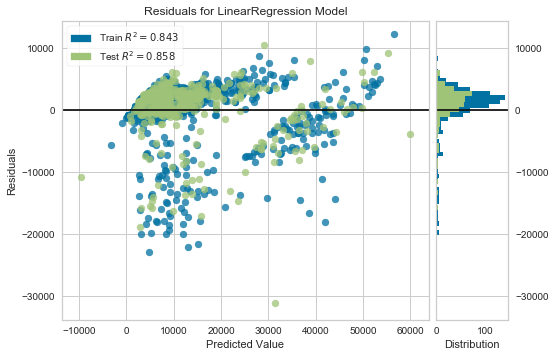

In [14]:
plot_model(lr)

In [15]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              random_state=123, subclass='binary',
                              target='charges',
         

In [16]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [17]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             random_state=123, subclass='binary',
                             target='charges',
                          

In [14]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
